In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


# Breast Cancer Wisconsin

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [3]:
X = pd.read_csv('data.csv')

In [4]:
X['diagnosis'][X['diagnosis'] == 'M'] = 1
X['diagnosis'][X['diagnosis'] == 'B'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
X.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
y = X.pop('diagnosis')

In [7]:
X.drop('id', axis=1, inplace=True)

In [8]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
X.isnull().values.any()

False

In [10]:
X.shape

(569, 30)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [13]:
!pip install optuna

     |████████████████████████████████| 308 kB 7.1 MB/s 
     |████████████████████████████████| 210 kB 31.6 MB/s 
     |████████████████████████████████| 81 kB 9.3 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 146 kB 38.4 MB/s 
     |████████████████████████████████| 112 kB 57.3 MB/s 
     |████████████████████████████████| 49 kB 3.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=9a70e25db04ee411fa96fefab1372b3b907e781dc04575e7d460b2dd8219eccf
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [14]:
import optuna

In [15]:
optuna.logging.set_verbosity(optuna.logging.ERROR)

# Grid Serach

In [195]:
def objective_gs(trial):
    C_vals = trial.suggest_float("C", 1e-5, 1e5)
    gamma_vals = trial.suggest_float('gamma', 1e-5, 1e5)
    clf_obj = SVC(kernel='rbf', C=C_vals, gamma=gamma_vals)
    score = cross_val_score(clf_obj, X_train, y_train.astype('int'), scoring='accuracy', n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

In [196]:
%%time
search_space = {'C': np.logspace(-5, 5, 20), 'gamma': np.logspace(-5, 5 ,20)}
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective_gs)

CPU times: user 12.6 s, sys: 430 ms, total: 13 s
Wall time: 34.6 s


In [197]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [198]:
print('SVC, grid search, best trial:')
print(study.best_trial.params)
print('SVC, grid search, best accuracy:')
print(study.best_value)
print('SVC, grid search, best trial number:')
print(study.best_trial.number)

SVC, grid search, best trial:
{'C': 20.6913808111479, 'gamma': 3.359818286283781e-05}
SVC, grid search, best accuracy:
0.9596835443037974
SVC, grid search, best trial number:
246


In [199]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [200]:
def evaluate_accuracy(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = (pred == y_test).mean()
    return accuracy

In [201]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, grid search, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, grid search, accuracy on test:
0.9415204678362573


In [202]:
accs = []
for i in range(5):
    model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
    accs.append(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))
print('SVC, grid search, average accuracy on test, 5 fits:')
print(np.mean(accs))

SVC, grid search, average accuracy on test, 5 fits:
0.9415204678362572


# Random Search

In [203]:
def objective(trial):
    C_vals = trial.suggest_float("C", 1e-5, 1e5, log=True)
    gamma_vals = trial.suggest_float('gamma', 1e-5, 1e5, log=True)
    clf_obj = SVC(kernel='rbf', C=C_vals, gamma=gamma_vals)
    score = cross_val_score(clf_obj, X_train, y_train.astype('int'), scoring='accuracy', n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

In [204]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler())
study.optimize(objective, n_trials=400)

CPU times: user 10 s, sys: 388 ms, total: 10.4 s
Wall time: 32.1 s


In [205]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [206]:
print('SVC, random search, best trial:')
print(study.best_trial.params)
print('SVC, random_search, best accuracy:')
print(study.best_value)
print('SVC, random search, best trial number')
print(study.best_trial.number)

SVC, random search, best trial:
{'C': 20.954984363464703, 'gamma': 5.058719092635542e-05}
SVC, random_search, best accuracy:
0.9572151898734178
SVC, random search, best trial number
159


In [207]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [208]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, random search, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, random search, accuracy on test:
0.9473684210526315


In [209]:
accs = []
for i in range(5):
    model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
    accs.append(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))
print('SVC, random search, average accuracy on test, 5 fits:')
print(np.mean(accs))

SVC, random search, average accuracy on test, 5 fits:
0.9473684210526315


# NSGA-II

In [276]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.NSGAIISampler())
study.optimize(objective, n_trials=400)

CPU times: user 10.7 s, sys: 447 ms, total: 11.2 s
Wall time: 30.7 s


In [277]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [278]:
print('SVC, NSGA-II, best trial:')
print(study.best_trial.params)
print('SVC, NSGA-II, best accuracy:')
print(study.best_value)
print('SVC, NSGA-II, best trial number:')
print(study.best_trial.number)

SVC, NSGA-II, best trial:
{'C': 28.241214102703413, 'gamma': 2.6991366172943427e-05}
SVC, NSGA-II, best accuracy:
0.9596835443037974
SVC, NSGA-II, best trial number:
333


In [279]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [280]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, NSGA-II, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, NSGA-II, accuracy on test:
0.9473684210526315


In [281]:
accs = []
for i in range(5):
    model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
    accs.append(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))
print('SVC, NSGA-II, average accuracy on test, 5 fits:')
print(np.mean(accs))

SVC, NSGA-II, average accuracy on test, 5 fits:
0.9473684210526315


# TPE

In [228]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=400)

CPU times: user 12.6 s, sys: 403 ms, total: 13 s
Wall time: 27.6 s


In [229]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [230]:
print('SVC, TPE, best trial:')
print(study.best_trial.params)
print('SVC, TPE, best accuracy:')
print(study.best_value)
print('SVC, TPE, best trial number:')
print(study.best_trial.number)

SVC, TPE, best trial:
{'C': 19.394404477499297, 'gamma': 4.8828952729473114e-05}
SVC, TPE, best accuracy:
0.9597151898734178
SVC, TPE, best trial number:
184


In [231]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [232]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, TPE, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, TPE, accuracy on test:
0.9415204678362573


In [233]:
accs = []
for i in range(5):
    model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
    accs.append(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))
print('SVC, TPE, average accuracy on test, 5 fits:')
print(np.mean(accs))

SVC, TPE, average accuracy on test, 5 fits:
0.9415204678362572


# CMA-ES

In [252]:
%%time
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.CmaEsSampler())
study.optimize(objective, n_trials=400)

CPU times: user 10.8 s, sys: 405 ms, total: 11.2 s
Wall time: 25.9 s


In [253]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [254]:
print('SVC, CMA-ES, best trial:')
print(study.best_trial.params)
print('SVC, CMA-ES, best accuracy:')
print(study.best_value)
print('SVC, CMA-ES, best trial number:')
print(study.best_trial.number)

SVC, CMA-ES, best trial:
{'C': 22.85104972348376, 'gamma': 3.026707750887337e-05}
SVC, CMA-ES, best accuracy:
0.9596835443037974
SVC, CMA-ES, best trial number:
40


In [255]:
fig = optuna.visualization.plot_contour(study, params=["C", "gamma"])
fig.show()

In [256]:
model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
print('SVC, CMA-ES, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, CMA-ES, accuracy on test:
0.9415204678362573


In [257]:
accs = []
for i in range(5):
    model = SVC(kernel='rbf', C=study.best_trial.params['C'], gamma=study.best_trial.params['gamma'])
    accs.append(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))
print('SVC, CMA-ES, average accuracy on test, 5 fits:')
print(np.mean(accs))

SVC, CMA-ES, average accuracy on test, 5 fits:
0.9415204678362572


# Bayesian optimization

In [16]:
! pip install scikit-optimize

     |████████████████████████████████| 100 kB 6.3 MB/s 


In [17]:
from skopt import BayesSearchCV, gp_minimize
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process, plot_evaluations
from skopt.space import Real, Categorical, Integer

In [284]:
%%time 
opt = BayesSearchCV(
    SVC(kernel='rbf'), 
    {
        'C': (1e-5, 1e5, 'log-uniform'),
        'gamma': (1e-5, 1e5, 'log-uniform')
    },
    n_iter=400,
    cv=5,
    scoring='accuracy'
)
opt.fit(X_train, y_train.astype('int'))

CPU times: user 2h 17min 59s, sys: 45min 2s, total: 3h 3min 2s
Wall time: 2h 15min 58s


In [285]:
print('SVC, BO, best trial:')
print(opt.best_params_)
print('SVC, BO, best accuracy:')
print(opt.best_score_)
print('SVC, BO, best trial number:')
print(opt.best_index_)

SVC, BO, best trial:
OrderedDict([('C', 35.279528075074545), ('gamma', 3.146600364616476e-05)])
SVC, BO, best accuracy:
0.9596835443037974
SVC, BO, best trial number:
57


In [286]:
from skopt.plots import plot_objective, plot_convergence, plot_gaussian_process, plot_evaluations

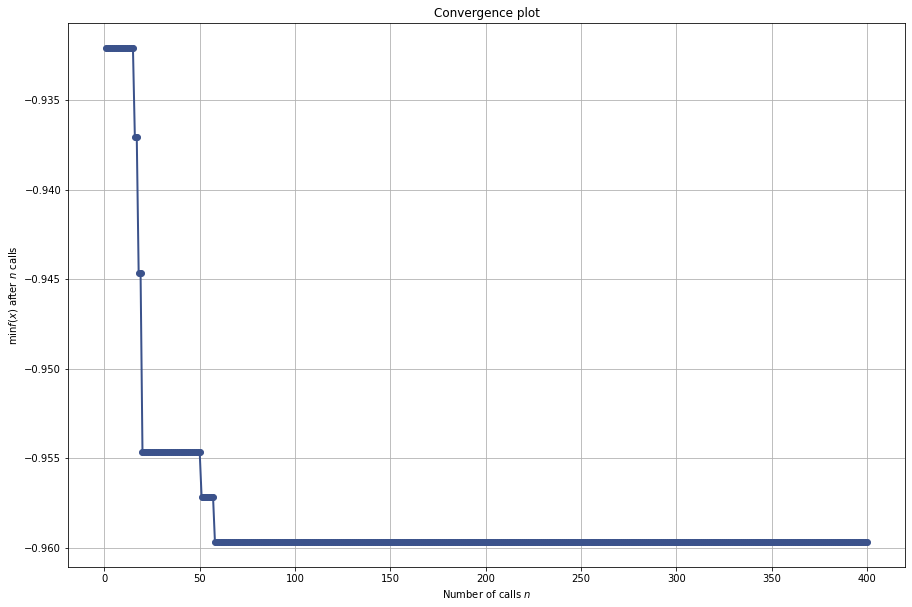

In [287]:
plt.figure(figsize=(15, 10))
vis = plot_convergence(*opt.optimizer_results_)

<Figure size 1440x1080 with 0 Axes>

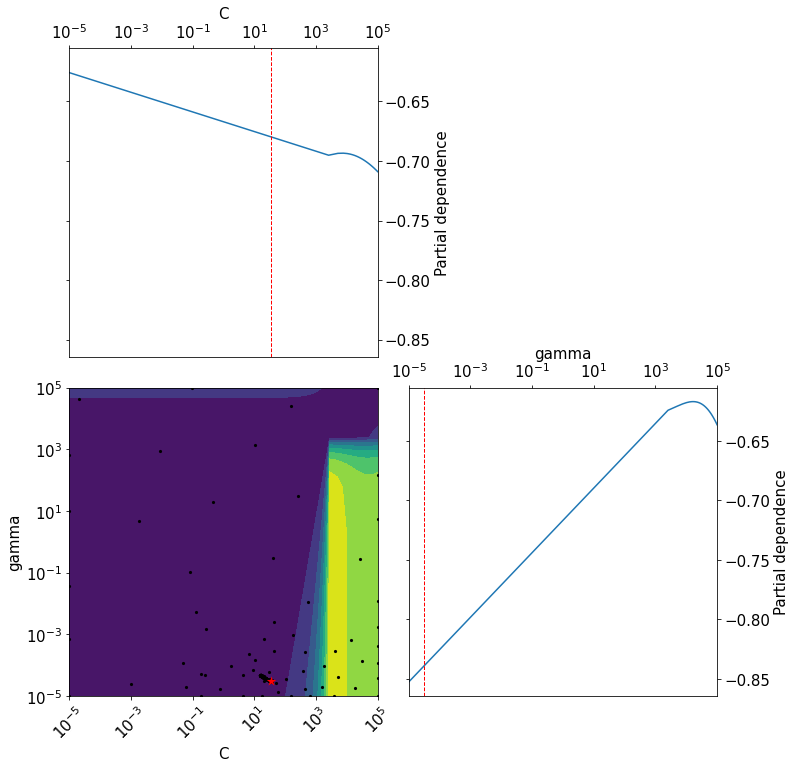

In [288]:
plt.rc('font', size=15)
plt.rc('lines', mew=5)
plt.figure(figsize=(20, 15))
plot_objective(*opt.optimizer_results_, size=5)
plt.savefig(fname='SVC_BCW_BO.pdf')

In [289]:
model = SVC(kernel='rbf', C=opt.best_params_['C'], gamma=opt.best_params_['gamma'])
print('SVC, BO, accuracy on test:')
print(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))

SVC, BO, accuracy on test:
0.935672514619883


In [290]:
accs = []
for i in range(5):
    model = SVC(kernel='rbf', C=opt.best_params_['C'], gamma=opt.best_params_['gamma'])
    accs.append(evaluate_accuracy(model, X_train, y_train.astype('int'), X_test, y_test.astype('int')))
print('SVC, BO, average accuracy on test, 5 fits:')
print(np.mean(accs))

SVC, BO, average accuracy on test, 5 fits:
0.935672514619883


In [23]:
res_gp = opt.optimizer_results_[0]

In [41]:
best_values = np.maximum.accumulate(-1 * res_gp.func_vals)
traces = [
            go.Scatter(
                x=np.arange(len(res_gp.func_vals)) + 1,
                y=-1 * res_gp.func_vals,
                mode="markers",
                name='Objective Value',
            ),
            go.Scatter(x=np.arange(len(res_gp.func_vals)) + 1, y=best_values, name="Best Value"),
        ]

layout = go.Layout(
        title="Optimization History Plot",
        xaxis={"title": "#Trials"},
        yaxis={"title": 'Objective Value'},
    )

fig = go.Figure(data=traces, layout=layout)
fig.show()

In [63]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
import math

padding = 0.5
min_val = math.pow(10, -5 - padding)
max_val = math.pow(10, 5 + padding)

layout = go.Layout(title="Contour Plot")


x_val = np.array(res_gp.x_iters)[:, 0]
y_val = np.array(res_gp.x_iters)[:, 1]
z = res_gp.func_vals

x_ax, y_ax = [], []
z_ax = []

for i in range(len(x_val)):
    x_ax.append(x_val[i])
    y_ax.append(y_val[i])
    z_ax.append(-1 * z[i])


x_ax.append(min_val)
y_ax.append(min_val)
z_ax.append(0.6)

x_ax.append(max_val)
y_ax.append(max_val)
z_ax.append(0.6)


contour = go.Contour(x=x_ax, y=y_ax, z = z_ax, 
        colorscale=plotly.colors.PLOTLY_SCALES["Blues"], colorbar={"title": "Objective Value"}, connectgaps=True,
        contours_coloring="heatmap",
        hoverinfo="none",
        
        line_smoothing=1.3)

scatter = go.Scatter(x=np.array(res_gp.x_iters)[:, 0], y=np.array(res_gp.x_iters)[:, 1],  marker={"line": {"width": 0.5, "color": "Grey"}, "color": "black"},
        mode="markers", showlegend=False)

fig = go.Figure(data=(contour, scatter), layout=layout)

fig.update_xaxes(range=[math.log10(min_val), math.log10(max_val)], type="log", title='C')
fig.update_yaxes(range=[math.log10(min_val), math.log10(max_val)], type="log", title='gamma')
fig.show()